In [10]:
import pandas as pd
import numpy as np
from sklearn import svm
from arcgis.features import GeoAccessor, GeoSeriesAccessor

sdf = pd.DataFrame.spatial.from_featureclass(r"G:\courses\qmsa\Chapter18\Chapter18.gdb\USA_Counties_2016")
sdf

,OBJECTID,OBJECTID_1,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,POP2000,POP00_SQMI,POP2010,...,Teen_Birth_Rate,Percent_Uninsured,Graduation_Rate,Drug_Overdose_Mortality_Rate,Motor_Vehicle_Mortality_Rate,Homicide_Rate,Percent_Rural,Quality_of_Life_Quartile,Length_of_Life_Quartile,SHAPE
0,1,1,Lake of the Woods,Minnesota,27,077,27077,4522,2.5,3935,...,23.48,6.40,NaN,NaN,NaN,NaN,100.00,3.0,3.0,"{'rings': [[[48953.072899997234, 1060039.71229..."
1,2,2,Ferry,Washington,53,019,53019,7260,3.2,7626,...,26.39,11.88,NaN,NaN,28.06,NaN,100.00,4.0,4.0,"{'rings': [[[-1700997.8681999967, 1207941.3803..."
2,3,3,Stevens,Washington,53,065,53065,40066,15.8,43965,...,27.56,8.54,85.42,15.17,18.96,3.27,79.21,4.0,3.0,"{'rings': [[[-1595383.5684999973, 1192593.4226..."
3,4,4,Okanogan,Washington,53,047,53047,39564,7.4,40731,...,47.66,14.50,84.07,15.28,21.08,3.80,79.99,4.0,3.0,"{'rings': [[[-1710065.1621000022, 1209073.2917..."
4,5,5,Pend Oreille,Washington,53,051,53051,11732,8.2,13023,...,23.71,7.58,86.53,NaN,24.17,NaN,83.11,4.0,4.0,"{'rings': [[[-1570303.2762999982, 1296843.7124..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3104,3105,3105,LaGrange,Indiana,18,087,18087,34909,90.3,38321,...,21.26,25.97,92.50,NaN,16.14,NaN,91.62,1.0,1.0,"{'rings': [[[856835.071800001, 328878.19319999..."
3105,3106,3106,Steuben,Indiana,18,151,18151,33214,103.0,34449,...,31.93,11.56,81.02,10.70,15.45,NaN,67.25,1.0,2.0,"{'rings': [[[928825.5485000014, 336886.8960000..."
3106,3107,3107,Pittsylvania,Virginia,51,143,51143,61745,63.1,62390,...,23.25,12.22,88.00,8.05,21.70,3.88,85.63,2.0,3.0,"{'rings': [[[1443580.5571999997, -141077.84650..."
3107,3108,3108,Danville,Virginia,51,590,51590,48411,1102.8,44749,...,45.44,11.76,73.00,15.82,10.39,16.09,4.52,4.0,4.0,"{'rings': [[[1459902.2104000002, -132517.85370..."


In [25]:
subsetdf = sdf[(sdf['STATE_NAME'] == 'Mississippi') | (sdf['STATE_NAME'] == 'California') | (sdf['STATE_NAME'] == 'Utah') | (sdf['STATE_NAME'] == 'Ohio')]

xt = 'average_summer_precip'
yt = 'averge_winter_temperature'
y2 = 'averge_summer_temperature'
y3 = 'average_winter_precip'

Xall = sdf[[xt, yt, y2, y3]]
# define dataset
X = subsetdf[[xt, yt, y2, y3]]
y = subsetdf[['STATE_NAME']]
subsetdf

,OBJECTID,OBJECTID_1,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,POP2000,POP00_SQMI,POP2010,...,Teen_Birth_Rate,Percent_Uninsured,Graduation_Rate,Drug_Overdose_Mortality_Rate,Motor_Vehicle_Mortality_Rate,Homicide_Rate,Percent_Rural,Quality_of_Life_Quartile,Length_of_Life_Quartile,SHAPE
596,597,597,Cache,Utah,49,005,49005,91391,77.9,116954,...,15.08,9.49,89.98,10.78,7.91,NaN,15.69,1.0,1.0,"{'rings': [[[-1283821.120099999, 376768.874600..."
597,598,598,Siskiyou,California,06,093,06093,44301,7.0,45600,...,30.24,9.30,89.70,27.53,18.82,5.52,65.83,4.0,4.0,"{'rings': [[[-2097052.065399997, 536397.4353],..."
599,600,600,Box Elder,Utah,49,003,49003,42745,6.4,50352,...,27.33,9.13,88.00,24.24,12.85,NaN,31.10,2.0,3.0,"{'rings': [[[-1371943.4992000014, 354414.11679..."
600,601,601,Rich,Utah,49,033,49033,1961,1.8,2421,...,NaN,12.51,NaN,NaN,NaN,NaN,100.00,3.0,2.0,"{'rings': [[[-1249700.950000003, 353189.170400..."
604,605,605,Del Norte,California,06,015,06015,27507,22.4,29698,...,49.98,8.11,35.15,17.07,26.10,7.16,33.67,2.0,4.0,"{'rings': [[[-2266836.116700001, 609789.847199..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2758,2759,2759,Jackson,Mississippi,28,059,28059,131420,126.0,135395,...,37.64,14.52,77.48,19.82,17.99,4.37,27.26,1.0,1.0,"{'rings': [[[733486.922799997, -922442.9805000..."
2766,2767,2767,Harrison,Mississippi,28,047,28047,189601,194.2,183018,...,42.65,16.82,78.25,17.72,14.79,7.72,22.84,2.0,1.0,"{'rings': [[[641562.9294999987, -900980.741900..."
2772,2773,2773,Hancock,Mississippi,28,045,28045,42967,77.8,40492,...,34.22,16.74,79.29,21.56,15.70,5.96,42.56,1.0,1.0,"{'rings': [[[622080.0971999988, -953269.558800..."
3096,3097,3097,Ashtabula,Ohio,39,007,39007,102728,75.1,101953,...,37.16,8.91,87.70,32.77,14.88,4.72,46.37,4.0,4.0,"{'rings': [[[1240793.9332000017, 378283.355099..."


In [26]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
fitmod = clf.fit(X,y)
predictOut = clf.predict(Xall, check_input=True)
predictOut

array(['Ohio', 'Utah', 'Utah', ..., 'Ohio', 'Ohio', 'Utah'], dtype=object)

In [27]:
a=pd.Series(predictOut)
a.name = "class"
joinedDate = sdf.join(a)
outputLOC = r"G:\courses\qmsa\Chapter18\Chapter18.gdb\USA_Counties_" + "RandomForest_Classes"
joinedDate.spatial.to_featureclass(location=outputLOC)

'G:\\courses\\qmsa\\Chapter18\\Chapter18.gdb\\USA_Counties_RandomForest_Classes'

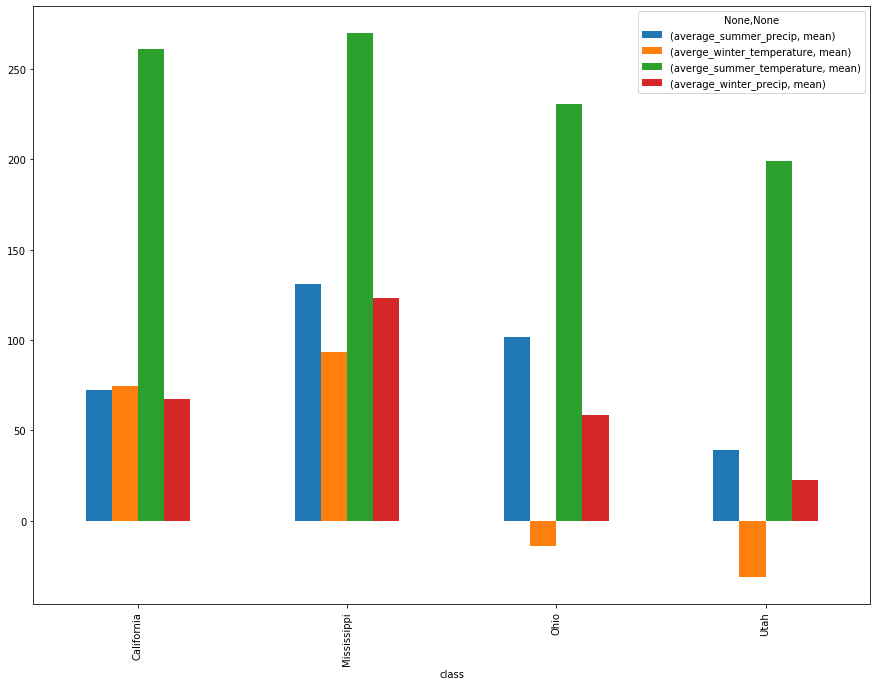

In [29]:
dfout = Xall.join(a)
dfout.groupby('class').agg(['mean']).plot.bar(figsize=(15,11))